In [2]:
# Imports
import os
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
table = "new_db_Feb2023.csv"
opened = open(table,"r")
readed = pd.read_csv(table, sep=",", na_filter=True)
readed = readed.fillna(-3333)
print(readed)

         Unnamed: 0        source_name cadence       tmin       tmax  \
0                 0  4FGL J0001.2-0747   daily  239587201  239846401   
1                 1  4FGL J0001.5+2113   daily  239587201  239846401   
2                 2  4FGL J0003.3-1928   daily  239587201  239846401   
3                 3  4FGL J0004.3+4614   daily  239587201  239846401   
4                 4  4FGL J0004.4-4737   daily  239587201  239846401   
...             ...                ...     ...        ...        ...   
4132745     4132745  4FGL J2358.0-4601  weekly  698630401  699235201   
4132746     4132746  4FGL J2358.3-1021  weekly  698630401  699235201   
4132747     4132747  4FGL J2358.3+3830  weekly  698630401  699235201   
4132748     4132748  4FGL J2359.0+3922  weekly  698630401  699235201   
4132749     4132749  4FGL J2359.2-3134  weekly  698630401  699235201   

         photon_flux2  photon_flux_error2  photon_index2  return_code2  \
0        2.720000e-08        3.300000e-08           2.18     

In [48]:
cadence = 'weekly'
# cadence = 'monthly'

In [49]:
cadence_df = readed.loc[(readed['cadence'] == cadence) #& \
                        # (readed['ts2'] <= 4.) & \
                        # (readed['photon_flux_error2'] <  readed['photon_flux2'])
                        ]
cadence_df.loc[cadence_df['ts2'] <= 9., 'photon_flux2'] = -3333
cadence_df.loc[cadence_df['photon_flux_error2'] > cadence_df['photon_flux2'], 'photon_flux2'] = -3333
print(cadence_df)

TSTART = np.amin(cadence_df['tmin'])
TSTOP = np.amax(cadence_df['tmax'])

         Unnamed: 0        source_name cadence       tmin       tmax  \
3050           3050  4FGL J0001.2-0747  weekly  239587201  240192001   
3051           3051  4FGL J0001.5+2113  weekly  239587201  240192001   
3052           3052  4FGL J0003.3-1928  weekly  239587201  240192001   
3053           3053  4FGL J0004.3+4614  weekly  239587201  240192001   
3054           3054  4FGL J0004.4-4737  weekly  239587201  240192001   
...             ...                ...     ...        ...        ...   
4132745     4132745  4FGL J2358.0-4601  weekly  698630401  699235201   
4132746     4132746  4FGL J2358.3-1021  weekly  698630401  699235201   
4132747     4132747  4FGL J2358.3+3830  weekly  698630401  699235201   
4132748     4132748  4FGL J2359.0+3922  weekly  698630401  699235201   
4132749     4132749  4FGL J2359.2-3134  weekly  698630401  699235201   

         photon_flux2  photon_flux_error2  photon_index2  return_code2  \
3050          -3333.0       -3.333000e+03       -3333.00     

In [50]:
names = np.unique(readed['source_name']) #.drop_duplicates(subset=['source_name'], inplace=False)#[1]
print(names, len(names))

['4FGL J0001.2-0747' '4FGL J0001.5+2113' '4FGL J0003.3-1928' ...
 '4FGL J2358.3-1021' '4FGL J2359.0+3922' '4FGL J2359.2-3134'] 1525


In [51]:
from fractional_variability import fvar
from fermi_catalog import select_bll, select_fsrq, select_bcu

In [52]:
fsrq_df = select_fsrq()
fsrq_names = fsrq_df['Source_Name']

fsrq_fmatrix = []
fsrq_fractionalflux = []
fsrq_nanbins = []
fsrq_nanbinsmatrix = []
for i, fsrq in enumerate(fsrq_names):
    # print(i, fsrq)
    source_array = cadence_df.loc[cadence_df['source_name'] == fsrq]
    averageflux = np.mean(source_array[source_array['photon_flux2']!=-3333]['photon_flux2'])
    
    flux = np.array(source_array[source_array['photon_flux2']!=-3333]['photon_flux2'])
    flux_err = np.array(source_array[source_array['photon_flux2']!=-3333]['photon_flux_error2'])
    var, var_err = fvar(flux, flux_err)

    factors = source_array['photon_flux2']/averageflux
    fsrq_nanbins.append(len(source_array[source_array['photon_flux2']== -3333]))
    fsrq_nanbinsmatrix.append(np.array(source_array['photon_flux2'] == -3333))
    fsrq_fmatrix.append(factors.tolist())
    fsrq_fractionalflux.append([fsrq, averageflux, var, var_err])

fsrq_fmatrix = np.array(fsrq_fmatrix)
fsrq_nanbinsmatrix = np.array(fsrq_nanbinsmatrix)



-----------------------------
Selecting FSRQ type blazars
Total number of variable objects: 572


In [53]:
bll_df = select_bll()
bll_names = bll_df['Source_Name']

bll_fmatrix = []
bll_fractionalflux = []
bll_nanbins = []
bll_nanbinsmatrix = []
for i, bll in enumerate(bll_names):
    # print(i, bll)
    source_array = cadence_df.loc[cadence_df['source_name'] == bll]
    averageflux = np.mean(source_array[source_array['photon_flux2']!=-3333]['photon_flux2'])
    
    flux = np.array(source_array[(source_array['photon_flux2']!=-3333) & (source_array['photon_flux_error2']!=-3333)]['photon_flux2'])
    flux_err = np.array(source_array[(source_array['photon_flux2']!=-3333) & (source_array['photon_flux_error2']!=-3333)]['photon_flux_error2'])
    var, var_err = fvar(flux, flux_err)

    factors = source_array['photon_flux2']/averageflux
    bll_nanbins.append(len(source_array[source_array['photon_flux2']==-3333]))
    bll_nanbinsmatrix.append(np.array(source_array['photon_flux2'] == -3333))
    bll_fmatrix.append(factors.tolist())
    bll_fractionalflux.append([bll, averageflux, var, var_err])

bll_fmatrix = np.array(bll_fmatrix)
bll_nanbinsmatrix = np.array(bll_nanbinsmatrix)


-----------------------------
Selecting BL Lac type blazars
Total number of variable objects: 477


In [54]:
bcu_df = select_bcu()
bcu_names = bcu_df['Source_Name']

bcu_fmatrix = []
bcu_fractionalflux = []
bcu_nanbins = []
bcu_nanbinsmatrix = []
for i, bcu in enumerate(bcu_names):
    # print(i, bcu)
    source_array = cadence_df.loc[cadence_df['source_name'] == bcu]
    averageflux = np.mean(source_array[source_array['photon_flux2']!=-3333]['photon_flux2'])
    
    flux = np.array(source_array[(source_array['photon_flux2']!=-3333) & (source_array['photon_flux_error2']!=-3333)]['photon_flux2'])
    flux_err = np.array(source_array[(source_array['photon_flux2']!=-3333) & (source_array['photon_flux_error2']!=-3333)]['photon_flux_error2'])
    var, var_err = fvar(flux, flux_err)

    factors = source_array['photon_flux2']/averageflux
    bcu_nanbins.append(len(source_array[source_array['photon_flux2']==-3333]))
    bcu_nanbinsmatrix.append(np.array(source_array['photon_flux2'] == -3333))
    bcu_fmatrix.append(factors.tolist())
    bcu_fractionalflux.append([bll, averageflux, var, var_err])

bcu_fmatrix = np.array(bcu_fmatrix)
bcu_nanbinsmatrix = np.array(bcu_nanbinsmatrix)


-----------------------------
Selecting unknown type blazars
Total number of variable objects: 364


/var/folders/c_/m9xq6z1d7ng4l884vymz4c240000gq/T/ipykernel_66712/2616650901.py:5: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("bone").copy()
  cmap.set_bad('Red',1.)


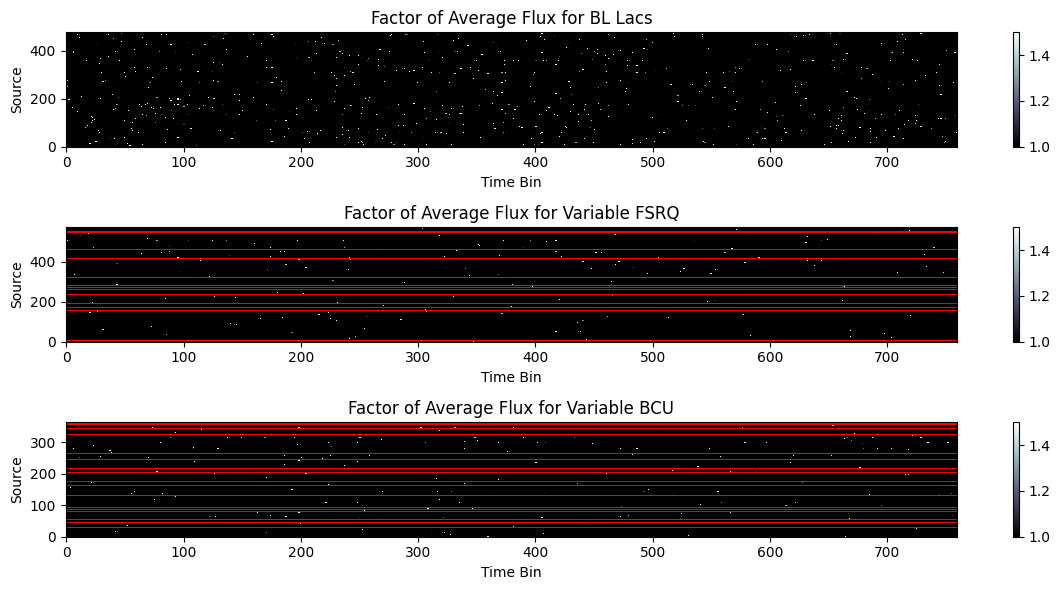

In [60]:
import matplotlib
cmap = matplotlib.cm.bone
import matplotlib.colors as colors

cmap.set_bad('Red',1.)

fig, ax = plt.subplots(3, 1, figsize=(12,6), sharex=True, )
bll_fmatrix_masked =  np.ma.masked_where(bll_nanbinsmatrix <0, bll_fmatrix)
fsrq_fmatrix_masked =  np.ma.masked_where(fsrq_nanbinsmatrix <0, fsrq_fmatrix)
bcu_fmatrix_masked =  np.ma.masked_where(bcu_nanbinsmatrix <0, bcu_fmatrix)
cax1 = ax[0].imshow(bll_fmatrix_masked, aspect='auto', interpolation='nearest', origin='lower', cmap='bone')#, extent=[TSTART/1e8, TSTOP/1e8, 0, len(bll_fmatrix)])
cax2 = ax[1].imshow(fsrq_fmatrix_masked, aspect='auto', interpolation='nearest', origin='lower', cmap='bone')#, extent=[TSTART/1e8, TSTOP/1e8, 0, len(bll_fmatrix)])
cax3 = ax[2].imshow(bcu_fmatrix_masked, aspect='auto', interpolation='nearest', origin='lower', cmap='bone')#, extent=[TSTART/1e8, TSTOP/1e8, 0, len(bll_fmatrix)])

cax1.set_clim(1.,1.5)
cax2.set_clim(1.,1.5)
cax3.set_clim(1.,1.5)

plt.colorbar(cax1, ax=ax[0])
plt.colorbar(cax2, ax=ax[1])
plt.colorbar(cax3, ax=ax[2])

ax[0].set_title("Factor of Average Flux for BL Lacs")
ax[0].set_xlabel("Time Bin")
ax[0].set_ylabel("Source")
ax[1].set_title("Factor of Average Flux for Variable FSRQ")
ax[1].set_xlabel("Time Bin")
ax[1].set_ylabel("Source")
ax[2].set_title("Factor of Average Flux for Variable BCU")
ax[2].set_xlabel("Time Bin")
ax[2].set_ylabel("Source")

ax[0].xaxis.set_ticks_position('bottom')
ax[1].xaxis.set_ticks_position('bottom')
ax[2].xaxis.set_ticks_position('bottom')

fig.tight_layout()


In [56]:
bll_fmatrix_plus = bll_fmatrix
bll_fmatrix_plus[bll_fmatrix_plus<1] = 0
Tot_score_bll = np.nansum(bll_fmatrix, axis=1)

fsrq_fmatrix_plus = fsrq_fmatrix
fsrq_fmatrix_plus[fsrq_fmatrix_plus<1] = 0
Tot_score_fsrq = np.nansum(fsrq_fmatrix, axis=1)

bcu_fmatrix_plus = bcu_fmatrix
bcu_fmatrix_plus[bcu_fmatrix_plus<1] = 0
Tot_score_bcu = np.nansum(bcu_fmatrix, axis=1)

print(np.nansum(Tot_score_bll)/len(Tot_score_bll), np.nansum(Tot_score_fsrq)/len(Tot_score_fsrq), np.nansum(Tot_score_bcu)/len(Tot_score_bcu))


13.708225216796055 2.7528963691330035 2.858908577020372


In [57]:
bll_fractionalfluxT = np.array(bll_fractionalflux).T
bll_var = np.sort(bll_fractionalfluxT[-2].astype(float))
bll_varerr = bll_fractionalfluxT[-1].astype(float)

fsrq_fractionalfluxT = np.array(fsrq_fractionalflux).T
fsrq_var = np.sort(fsrq_fractionalfluxT[-2].astype(float))
fsrq_varerr = fsrq_fractionalfluxT[-1].astype(float)

bcu_fractionalfluxT = np.array(bcu_fractionalflux).T
bcu_var = np.sort(bcu_fractionalfluxT[-2].astype(float))
bcu_varerr = bcu_fractionalfluxT[-1].astype(float)

(450.0, 600.0)

/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpecte

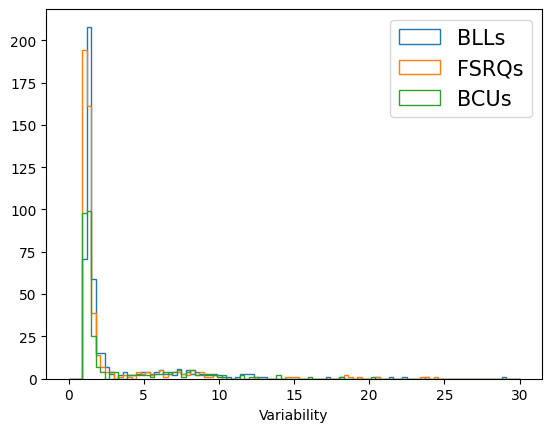

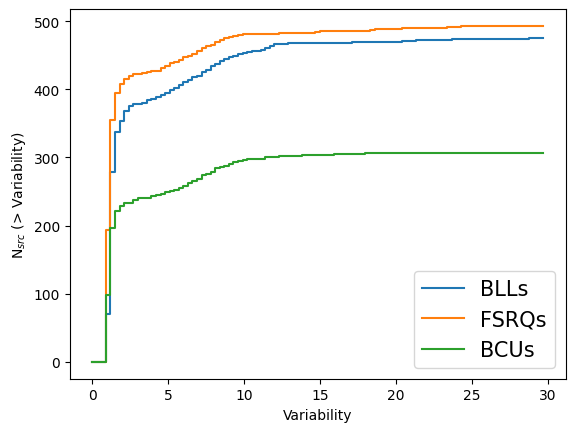

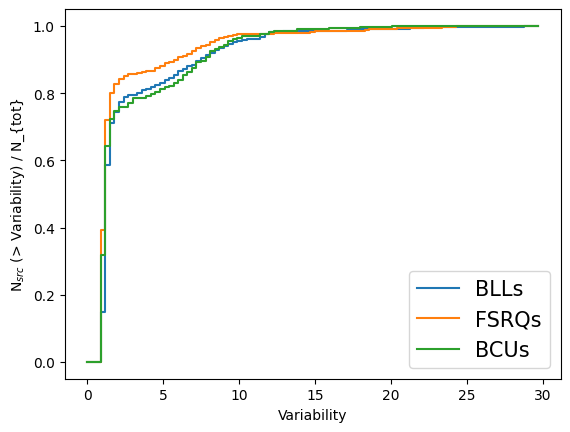

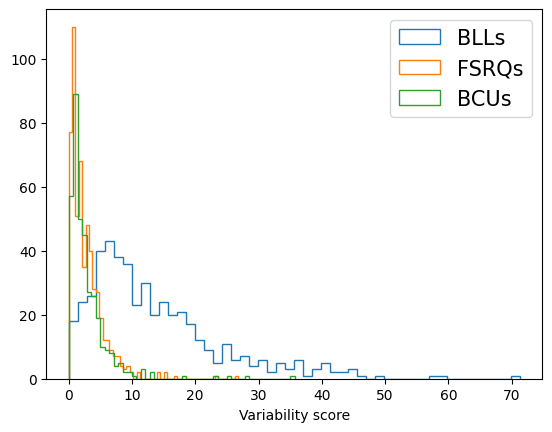

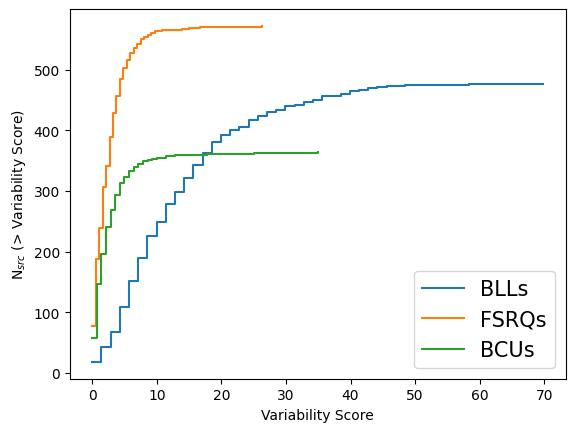

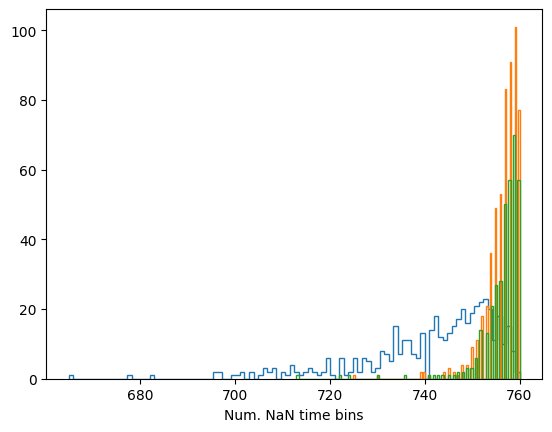

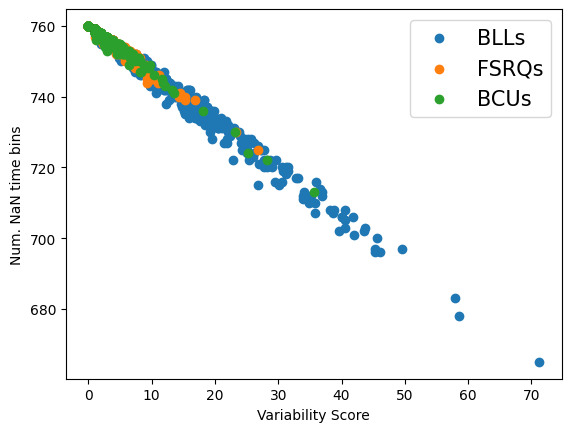

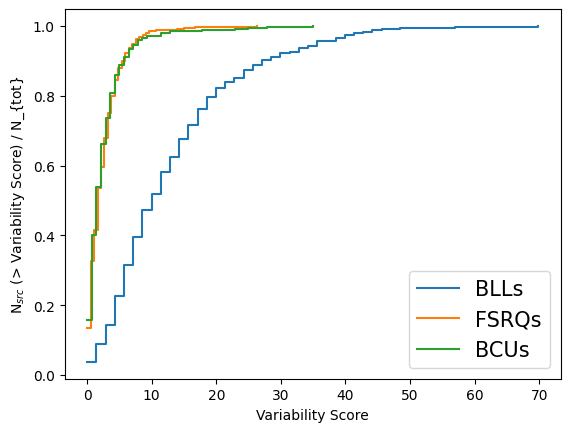

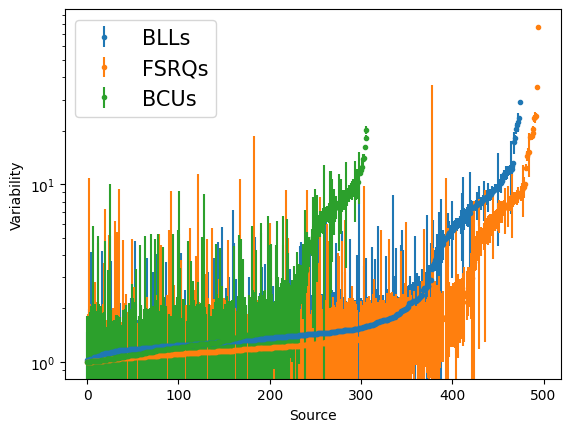

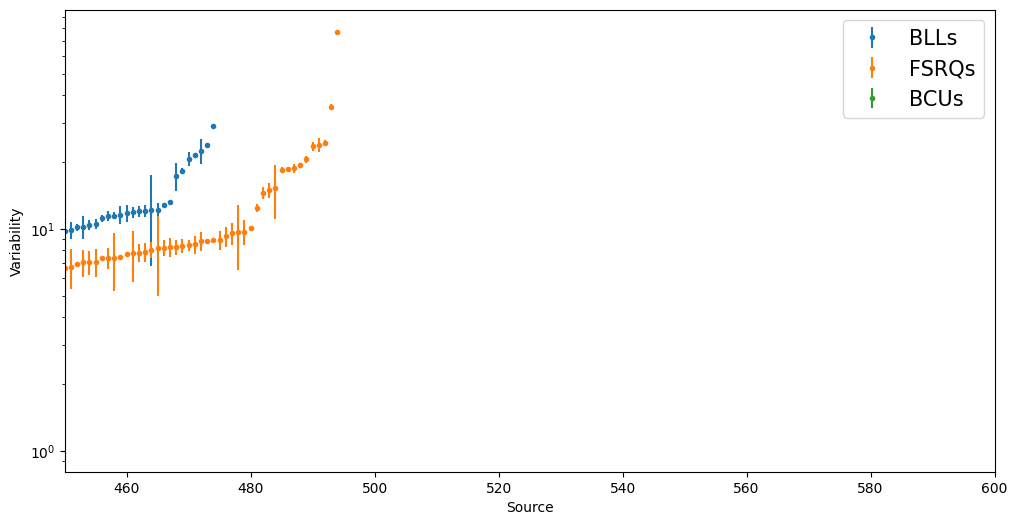

In [58]:
plt.figure()
bllh, bllhx, bllp = plt.hist(bll_var, bins=100, range=(0, 30),histtype='step', label='BLLs')
fsrqh, fsrqhx, fsrqp = plt.hist(fsrq_var, bins=100,range=(0, 30), histtype='step', label='FSRQs')
bcuh, bcuhx, bcup = plt.hist(bcu_var, bins=100, range=(0, 30),histtype='step', label='BCUs')
plt.legend(fontsize=15)
plt.xlabel('Variability')

plt.figure()
plt.step(bllhx[:-1], np.cumsum(bllh), where='post', label='BLLs')
plt.step(fsrqhx[:-1], np.cumsum(fsrqh), where='post', label='FSRQs')
plt.step(bcuhx[:-1], np.cumsum(bcuh), where='post', label='BCUs')
plt.legend(fontsize=15)
plt.xlabel('Variability')
plt.ylabel(r'N$_{src}$ (> Variability)')

plt.figure()
plt.step(bllhx[:-1], np.cumsum(bllh) / np.sum(bllh), where='post', label='BLLs')
plt.step(fsrqhx[:-1], np.cumsum(fsrqh) / np.sum(fsrqh), where='post', label='FSRQs')
plt.step(bcuhx[:-1], np.cumsum(bcuh) / np.sum(bcuh), where='post', label='BCUs')
plt.legend(fontsize=15)
plt.xlabel('Variability')
plt.ylabel(r'N$_{src}$ (> Variability) / N_{tot}')

plt.figure()
bllh2, bllhx2, bllp2 = plt.hist(Tot_score_bll, bins=50,  histtype='step', label='BLLs')
fsrqh2, fsrqhx2, fsrqp2 = plt.hist(Tot_score_fsrq, bins=50, histtype='step', label='FSRQs')
bcuh2, bcuhx2, bcup2 = plt.hist(Tot_score_bcu, bins=50,  histtype='step', label='BCUs')
plt.legend(fontsize=15)
plt.xlabel('Variability score')

plt.figure()
plt.step(bllhx2[:-1], np.cumsum(bllh2), where='post', label='BLLs')
plt.step(fsrqhx2[:-1], np.cumsum(fsrqh2), where='post', label='FSRQs')
plt.step(bcuhx2[:-1], np.cumsum(bcuh2), where='post', label='BCUs')
plt.legend(fontsize=15)
plt.xlabel('Variability Score')
plt.ylabel(r'N$_{src}$ (> Variability Score)')

plt.figure()
plt.hist(bll_nanbins, bins=100,  histtype='step', label='BLLs')
plt.hist(fsrq_nanbins, bins=100, histtype='step', label='FSRQs')
plt.hist(bcu_nanbins, bins=100, histtype='step', label='BCUs')
plt.xlabel('Num. NaN time bins')

plt.figure()
plt.scatter(Tot_score_bll, bll_nanbins,label='BLLs')
plt.scatter(Tot_score_fsrq, fsrq_nanbins, label='FSRQs')
plt.scatter(Tot_score_bcu, bcu_nanbins, label='BCUs')
plt.legend(fontsize=15)
plt.xlabel('Variability Score')
plt.ylabel(r'Num. NaN time bins')

plt.figure()
plt.step(bllhx2[:-1], np.cumsum(bllh2) / np.sum(bllh2), where='post', label='BLLs')
plt.step(fsrqhx2[:-1], np.cumsum(fsrqh2) / np.sum(fsrqh2), where='post', label='FSRQs')
plt.step(bcuhx2[:-1], np.cumsum(bcuh2) / np.sum(bcuh2), where='post', label='BCUs')
plt.legend(fontsize=15)
plt.xlabel('Variability Score')
plt.ylabel(r'N$_{src}$ (> Variability Score) / N_{tot}')


plt.figure()
plt.errorbar(np.arange(len(bll_var)), bll_var, yerr=bll_varerr, fmt='.', label='BLLs')
plt.errorbar(np.arange(len(fsrq_var)), fsrq_var, yerr=fsrq_varerr, fmt='.', label='FSRQs')
plt.errorbar(np.arange(len(bcu_var)), bcu_var, yerr=bcu_varerr, fmt='.', label='BCUs')

plt.legend(fontsize=15)
plt.yscale('log')
plt.ylabel('Variability')
plt.xlabel('Source')

plt.figure(figsize=(12, 6))
plt.errorbar(np.arange(len(bll_var)), bll_var, yerr=bll_varerr, fmt='.', label='BLLs')
plt.errorbar(np.arange(len(fsrq_var)), fsrq_var, yerr=fsrq_varerr, fmt='.', label='FSRQs')
plt.errorbar(np.arange(len(bcu_var)), bcu_var, yerr=bcu_varerr, fmt='.', label='BCUs')
plt.legend(fontsize=15)
plt.yscale('log')
plt.ylabel('Variability')
plt.xlabel('Source')
plt.xlim(450, 600)
